In [250]:
from preprocess import to_df
import pandas as pd
import numpy as np


In [261]:
with open('raw/rohbau.json') as f:
    df = to_df(f).iloc[2:,:]
ids = df['cpID'].copy()

In [262]:
print(*(c for c in df.columns), sep='\n')

Axis0X
Axis0Y
Axis0Z
Axis1X
Axis1Y
Axis1Z
Axis2X
Axis2Y
Axis2Z
CenterX
CenterY
CenterZ
ExtentX
ExtentY
ExtentZ
WorldOrientation
ifcMaterialLayerTotalThickness
ImportFileName
cpLateralArea2
ifcOwnerHistory
cpID
cpMaterialName
cpIsOpening
cpMaterialDiffuseGreen
ifcTag
ifcMaterial
cpBaseAreaContact
cpMaterialAmbientGreen
Pset_WallCommon:Reference
Elevation
ifcMaterialLayerSetName
ifcLayer
ifcRepresentationIdentifier
cpCountLinkedTasks
cpCOGy
cpCountTriangles
cpIsPart
cpIsPartOfComposite
cpTopAreaPartMin
cpName
cpBBoxDX
cpVolumeInterval
cpSurfacePartAreaMin
cpBBoxMaxY
cpCountLinkedProcessComponents
ifcTypeObjectName
ifcDescription
cpTopAreaPartMax
Pset_WallCommon:LoadBearing
cpMaterialAmbientBlue
cpSurfacePartAreaList
cpBBoxMinX
cpBaseArea
cpSurfaceArea
cpIsProxy
cpMaterialDiffuseBlue
cpMaterialAmbient
cpBaseAreaPartMax
cpCountLinkedDocuments
cpTopArea
cpHasCurvedSurfacePart
cpCountLines
Pset_WallSpecific:ElementMainMateriality
cpMaterialDiffuse
cpBBoxDZ
cpBBoxMinY
cpBBoxMinZ
cpIsComposite

In [263]:
for c in df.columns:
    if not c.startswith('Axis') and not c.startswith('Center') and not c.startswith('Extent'):
        print(c +'\n', df[c].value_counts(),"___________" ,sep='\n', end="\n\n")

WorldOrientation

vertical                     1634
horizontal                    340
diagonal_equal_greater_45       2
diagonal_lower_45               1
Name: WorldOrientation, dtype: int64
___________

ifcMaterialLayerTotalThickness

0    327
Name: ifcMaterialLayerTotalThickness, dtype: int64
___________

ImportFileName

1.5.22.3-LGG-EN-TWP-B.ifc    1977
Name: ImportFileName, dtype: int64
___________

cpLateralArea2

11.305590     199
14.131987      87
16.958385      46
8.479192       44
25.437577      41
19.784782      31
1.490363       30
21.197981      27
1.788772       26
1.604101       22
3.941815       10
2.666283       10
2.666276       10
0.974742       10
1.553115        8
2.051210        7
0.735206        7
9.892391        7
27.930000       6
2.031600        6
1.318042        6
2.461915        5
4.452584        5
4.453142        5
1.608023        5
7.375000        4
12.540000       4
6.242495        4
1.929991        4
13.398000       4
4.400040        4
23.400000       4
1

{"msg": "More than 25 surface parts."}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           55
{"spList": [0.6352404546286522,0.63524045462865197,22.611179415499073]}                                                                                                                                                                                                                                                                                                                                                                                                             

Name: cpHasOOBBxy, dtype: int64
___________

ifcTypeObject

IfcWallType      742
IfcBeamType      299
IfcColumnType    186
IfcSlabType      137
Name: ifcTypeObject, dtype: int64
___________

ifcMaterialLayerThickness

0.25    96
0.2     96
0.26    78
0.3     21
0.4     17
0.35     9
0.45     2
0.32     2
0.28     2
0.6      1
0.24     1
0.5      1
0.38     1
Name: ifcMaterialLayerThickness, dtype: int64
___________

ifcObject

D90              486
380*25           115
380*20           113
150*100           99
D25               98
D30               67
25*30             42
25*45             37
164*25            30
377*25            30
26*3759           22
50*247            20
396*25            16
400*25            16
377*20            15
406*20            15
25*16             15
410*25            15
HEM400            14
409*25            14
355*25            14
364*25            12
50*116.01         11
60*80             11
455*20            11
60*49             11
386*25            11
40

In [264]:
cols = df.columns.copy()
for c in cols:
    unique_string = df[c].nunique() == len(df[c].dropna())
    almost_unique_string = df[c].nunique() >= len(df[c].dropna()) * .95
    is_string = df[c].dtype == 'object'
    constant_or_novalue = len(df[c].value_counts()) <= 1
    if constant_or_novalue or (is_string and (unique_string or almost_unique_string)) or (is_string and np.all(df[c].str.contains('{'))):
        print(df[c])
        df.drop(c, axis=1, inplace=True)

2          0
3       <NA>
4       <NA>
5          0
6       <NA>
7       <NA>
8       <NA>
9       <NA>
10      <NA>
11      <NA>
12      <NA>
13      <NA>
14         0
15      <NA>
16      <NA>
17      <NA>
18      <NA>
19      <NA>
20      <NA>
21      <NA>
22      <NA>
23         0
24      <NA>
25      <NA>
26      <NA>
27      <NA>
28         0
29      <NA>
30      <NA>
31         0
32      <NA>
33      <NA>
34      <NA>
35      <NA>
36      <NA>
37         0
38      <NA>
39         0
40      <NA>
41      <NA>
42      <NA>
43      <NA>
44      <NA>
45      <NA>
46      <NA>
47         0
48         0
49      <NA>
50         0
51      <NA>
52      <NA>
53      <NA>
54      <NA>
55      <NA>
56      <NA>
57      <NA>
58         0
59      <NA>
60      <NA>
61         0
62      <NA>
63      <NA>
64      <NA>
65      <NA>
66      <NA>
67      <NA>
68      <NA>
69      <NA>
70      <NA>
71      <NA>
72      <NA>
73      <NA>
74      <NA>
75      <NA>
76      <NA>
77      <NA>
78      <NA>

2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0
100     0
101     0


2       {"spList": [0.17499533298038616,0.174995332980...
3       {"spList": [0.048838549968824044,0.04883854996...
4       {"spList": [0.63524045462865208,0.635240454628...
5       {"spList": [0.68749996773581235,0.687499967735...
6       {"spList": [6.6658500003644265,0.8025109204454...
7       {"spList": [0.070380449476342616,0.07038044947...
8       {"spList": [0.6352404546286522,0.6352404546286...
9       {"spList": [13.360576806224426,1.9798920000000...
10      {"spList": [30.150960104776601,0.8420000000000...
11      {"spList": [37.453852390848525,0.7320000000000...
12      {"spList": [0.63524045462865264,0.635240454628...
13      {"spList": [18.589500675825967,0.9900000000000...
14      {"spList": [2.3874750000149483,2.3874750000149...
15      {"spList": [0.04883854996882403,0.048838549968...
16      {"spList": [0.6352404546286522,0.6352404546286...
17      {"spList": [1.5000000000000051,1.4999999999999...
18      {"spList": [0.6352404546286522,0.6352404546286...
19      {"spLi

2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0
100     0
101     0


2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0
100     0
101     0


2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0
100     0
101     0


2           <NA>
3           <NA>
4           <NA>
5           <NA>
6           <NA>
7           <NA>
8           <NA>
9           <NA>
10          <NA>
11          <NA>
12          <NA>
13          <NA>
14          <NA>
15          <NA>
16          <NA>
17          <NA>
18          <NA>
19          <NA>
20          <NA>
21          <NA>
22          <NA>
23          <NA>
24          <NA>
25          <NA>
26          <NA>
27          <NA>
28      CONCRETE
29          <NA>
30          <NA>
31      CONCRETE
32          <NA>
33          <NA>
34          <NA>
35          <NA>
36          <NA>
37          <NA>
38          <NA>
39          <NA>
40          <NA>
41          <NA>
42          <NA>
43          <NA>
44          <NA>
45          <NA>
46          <NA>
47      CONCRETE
48          <NA>
49          <NA>
50      CONCRETE
51          <NA>
52          <NA>
53          <NA>
54          <NA>
55          <NA>
56          <NA>
57          <NA>
58          <NA>
59          <NA>
60          <N

In [265]:
df.columns.shape

(80,)

In [266]:
def display_na(df):
    print(df.cpName.iloc[0],':' ,len(df))
    for c, i in zip(df.columns, np.sum(df.isna())):
        print(c, i)
    print('____________', end='\n\n')
    
for name, group in df.groupby('cpName'):
    display_na(group)

Bodenplatte im EG : 14
Axis0X 0
Axis0Y 0
Axis0Z 0
Axis1X 0
Axis1Y 0
Axis1Z 0
Axis2X 0
Axis2Y 0
Axis2Z 0
CenterX 0
CenterY 0
CenterZ 0
ExtentX 0
ExtentY 0
ExtentZ 0
WorldOrientation 0
cpLateralArea2 0
cpMaterialName 0
cpMaterialDiffuseGreen 0
ifcMaterial 0
cpBaseAreaContact 0
cpMaterialAmbientGreen 0
Pset_WallCommon:Reference 14
ifcMaterialLayerSetName 1
ifcRepresentationIdentifier 0
cpCOGy 0
cpCountTriangles 0
cpIsPart 0
cpTopAreaPartMin 0
cpName 0
cpBBoxDX 0
cpVolumeInterval 0
cpSurfacePartAreaMin 0
cpBBoxMaxY 0
ifcTypeObjectName 1
ifcDescription 0
cpTopAreaPartMax 0
Pset_WallCommon:LoadBearing 14
cpMaterialAmbientBlue 0
cpBBoxMinX 0
cpBaseArea 0
cpSurfaceArea 0
cpMaterialDiffuseBlue 0
cpMaterialAmbient 0
cpBaseAreaPartMax 0
cpTopArea 0
cpHasCurvedSurfacePart 0
cpMaterialDiffuse 0
cpBBoxDZ 0
cpBBoxMinY 0
cpBBoxMinZ 0
cpCountLinkedBuildingStructureElements 0
cpTopAreaContact 0
ifcRepresentationType 0
cpCOGx 0
cpMaterialAmbientRed 0
cpBaseAreaPartMin 0
cpBBoxMaxZ 0
ifcType 0
cpSurfacePa

Pset_WallCommon:LoadBearing 1
cpMaterialAmbientBlue 0
cpBBoxMinX 0
cpBaseArea 0
cpSurfaceArea 0
cpMaterialDiffuseBlue 0
cpMaterialAmbient 0
cpBaseAreaPartMax 0
cpTopArea 0
cpHasCurvedSurfacePart 0
cpMaterialDiffuse 0
cpBBoxDZ 0
cpBBoxMinY 0
cpBBoxMinZ 0
cpCountLinkedBuildingStructureElements 0
cpTopAreaContact 0
ifcRepresentationType 0
cpCOGx 0
cpMaterialAmbientRed 0
cpBaseAreaPartMin 0
cpBBoxMaxZ 0
ifcType 0
cpSurfacePartAreaMax 0
cpVolumeUnchecked 0
ifcTypeObject 0
ifcMaterialLayerThickness 0
ifcObject 0
cpBBoxDY 0
cpCOGz 0
cpCountVertices 0
cpBBoxMaxX 0
cpVolume 0
cpMaterialID 0
cpMaterialDiffuseRed 0
Pset_ColumnCommon:Reference 1
ifcProfileType 1
PredefinedType 0
cpLateralArea 0
Pset_BeamCommon:Reference 1
Pset_BeamSpecific:ElementMainMateriality 1
Pset_SlabCommon:Reference 0
Pset_SlabCommon:LoadBearing 0
cpCircumference 0
____________

STB-Decke Ã¼. 3.OG - Teil 10 : 1
Axis0X 0
Axis0Y 0
Axis0Z 0
Axis1X 0
Axis1Y 0
Axis1Z 0
Axis2X 0
Axis2Y 0
Axis2Z 0
CenterX 0
CenterY 0
CenterZ 0
Ext

cpBaseAreaPartMin 0
cpBBoxMaxZ 0
ifcType 0
cpSurfacePartAreaMax 0
cpVolumeUnchecked 0
ifcTypeObject 0
ifcMaterialLayerThickness 0
ifcObject 0
cpBBoxDY 0
cpCOGz 0
cpCountVertices 0
cpBBoxMaxX 0
cpVolume 0
cpMaterialID 0
cpMaterialDiffuseRed 0
Pset_ColumnCommon:Reference 1
ifcProfileType 1
PredefinedType 0
cpLateralArea 0
Pset_BeamCommon:Reference 1
Pset_BeamSpecific:ElementMainMateriality 1
Pset_SlabCommon:Reference 0
Pset_SlabCommon:LoadBearing 0
cpCircumference 0
____________

STB-Decke Ã¼. 3.OG - Teil 2 : 1
Axis0X 0
Axis0Y 0
Axis0Z 0
Axis1X 0
Axis1Y 0
Axis1Z 0
Axis2X 0
Axis2Y 0
Axis2Z 0
CenterX 0
CenterY 0
CenterZ 0
ExtentX 0
ExtentY 0
ExtentZ 0
WorldOrientation 0
cpLateralArea2 0
cpMaterialName 0
cpMaterialDiffuseGreen 0
ifcMaterial 0
cpBaseAreaContact 0
cpMaterialAmbientGreen 0
Pset_WallCommon:Reference 1
ifcMaterialLayerSetName 0
ifcRepresentationIdentifier 0
cpCOGy 0
cpCountTriangles 0
cpIsPart 0
cpTopAreaPartMin 0
cpName 0
cpBBoxDX 0
cpVolumeInterval 0
cpSurfacePartAreaMin 0
cpB

cpBBoxMinY 0
cpBBoxMinZ 0
cpCountLinkedBuildingStructureElements 0
cpTopAreaContact 0
ifcRepresentationType 0
cpCOGx 0
cpMaterialAmbientRed 0
cpBaseAreaPartMin 0
cpBBoxMaxZ 0
ifcType 0
cpSurfacePartAreaMax 0
cpVolumeUnchecked 0
ifcTypeObject 0
ifcMaterialLayerThickness 0
ifcObject 0
cpBBoxDY 0
cpCOGz 0
cpCountVertices 0
cpBBoxMaxX 0
cpVolume 0
cpMaterialID 0
cpMaterialDiffuseRed 0
Pset_ColumnCommon:Reference 1
ifcProfileType 1
PredefinedType 0
cpLateralArea 0
Pset_BeamCommon:Reference 1
Pset_BeamSpecific:ElementMainMateriality 1
Pset_SlabCommon:Reference 0
Pset_SlabCommon:LoadBearing 0
cpCircumference 0
____________

STB-Decke Ã¼. 4.OG : 7
Axis0X 0
Axis0Y 0
Axis0Z 0
Axis1X 0
Axis1Y 0
Axis1Z 0
Axis2X 0
Axis2Y 0
Axis2Z 0
CenterX 0
CenterY 0
CenterZ 0
ExtentX 0
ExtentY 0
ExtentZ 0
WorldOrientation 0
cpLateralArea2 0
cpMaterialName 0
cpMaterialDiffuseGreen 0
ifcMaterial 0
cpBaseAreaContact 0
cpMaterialAmbientGreen 0
Pset_WallCommon:Reference 7
ifcMaterialLayerSetName 0
ifcRepresentationIde

Axis0X 0
Axis0Y 0
Axis0Z 0
Axis1X 0
Axis1Y 0
Axis1Z 0
Axis2X 0
Axis2Y 0
Axis2Z 0
CenterX 0
CenterY 0
CenterZ 0
ExtentX 0
ExtentY 0
ExtentZ 0
WorldOrientation 0
cpLateralArea2 0
cpMaterialName 0
cpMaterialDiffuseGreen 0
ifcMaterial 0
cpBaseAreaContact 0
cpMaterialAmbientGreen 0
Pset_WallCommon:Reference 40
ifcMaterialLayerSetName 40
ifcRepresentationIdentifier 0
cpCOGy 0
cpCountTriangles 0
cpIsPart 0
cpTopAreaPartMin 0
cpName 0
cpBBoxDX 0
cpVolumeInterval 0
cpSurfacePartAreaMin 0
cpBBoxMaxY 0
ifcTypeObjectName 0
ifcDescription 0
cpTopAreaPartMax 0
Pset_WallCommon:LoadBearing 40
cpMaterialAmbientBlue 0
cpBBoxMinX 0
cpBaseArea 0
cpSurfaceArea 0
cpMaterialDiffuseBlue 0
cpMaterialAmbient 0
cpBaseAreaPartMax 0
cpTopArea 0
cpHasCurvedSurfacePart 0
cpMaterialDiffuse 0
cpBBoxDZ 0
cpBBoxMinY 0
cpBBoxMinZ 0
cpCountLinkedBuildingStructureElements 0
cpTopAreaContact 0
ifcRepresentationType 0
cpCOGx 0
cpMaterialAmbientRed 0
cpBaseAreaPartMin 0
cpBBoxMaxZ 0
ifcType 0
cpSurfacePartAreaMax 0
cpVolumeUn

ifcMaterialLayerThickness 71
ifcObject 0
cpBBoxDY 0
cpCOGz 0
cpCountVertices 0
cpBBoxMaxX 0
cpVolume 0
cpMaterialID 0
cpMaterialDiffuseRed 0
Pset_ColumnCommon:Reference 89
ifcProfileType 89
PredefinedType 89
cpLateralArea 0
Pset_BeamCommon:Reference 89
Pset_BeamSpecific:ElementMainMateriality 89
Pset_SlabCommon:Reference 89
Pset_SlabCommon:LoadBearing 89
cpCircumference 89
____________

STB-Wand im 4.OG : 88
Axis0X 0
Axis0Y 0
Axis0Z 0
Axis1X 0
Axis1Y 0
Axis1Z 0
Axis2X 0
Axis2Y 0
Axis2Z 0
CenterX 0
CenterY 0
CenterZ 0
ExtentX 0
ExtentY 0
ExtentZ 0
WorldOrientation 0
cpLateralArea2 0
cpMaterialName 0
cpMaterialDiffuseGreen 0
ifcMaterial 0
cpBaseAreaContact 0
cpMaterialAmbientGreen 0
Pset_WallCommon:Reference 0
ifcMaterialLayerSetName 62
ifcRepresentationIdentifier 0
cpCOGy 0
cpCountTriangles 0
cpIsPart 0
cpTopAreaPartMin 0
cpName 0
cpBBoxDX 0
cpVolumeInterval 0
cpSurfacePartAreaMin 0
cpBBoxMaxY 0
ifcTypeObjectName 0
ifcDescription 0
cpTopAreaPartMax 0
Pset_WallCommon:LoadBearing 0
cpMate

cpMaterialID 0
cpMaterialDiffuseRed 0
Pset_ColumnCommon:Reference 14
ifcProfileType 0
PredefinedType 14
cpLateralArea 0
Pset_BeamCommon:Reference 0
Pset_BeamSpecific:ElementMainMateriality 0
Pset_SlabCommon:Reference 14
Pset_SlabCommon:LoadBearing 14
cpCircumference 14
____________

Stiege im EG : 1
Axis0X 0
Axis0Y 0
Axis0Z 0
Axis1X 0
Axis1Y 0
Axis1Z 0
Axis2X 0
Axis2Y 0
Axis2Z 0
CenterX 0
CenterY 0
CenterZ 0
ExtentX 0
ExtentY 0
ExtentZ 0
WorldOrientation 0
cpLateralArea2 0
cpMaterialName 0
cpMaterialDiffuseGreen 0
ifcMaterial 0
cpBaseAreaContact 0
cpMaterialAmbientGreen 0
Pset_WallCommon:Reference 1
ifcMaterialLayerSetName 1
ifcRepresentationIdentifier 0
cpCOGy 0
cpCountTriangles 0
cpIsPart 0
cpTopAreaPartMin 0
cpName 0
cpBBoxDX 0
cpVolumeInterval 0
cpSurfacePartAreaMin 0
cpBBoxMaxY 0
ifcTypeObjectName 0
ifcDescription 0
cpTopAreaPartMax 0
Pset_WallCommon:LoadBearing 1
cpMaterialAmbientBlue 0
cpBBoxMinX 0
cpBaseArea 0
cpSurfaceArea 0
cpMaterialDiffuseBlue 0
cpMaterialAmbient 0
cpBaseAr

Axis0X 0
Axis0Y 0
Axis0Z 0
Axis1X 0
Axis1Y 0
Axis1Z 0
Axis2X 0
Axis2Y 0
Axis2Z 0
CenterX 0
CenterY 0
CenterZ 0
ExtentX 0
ExtentY 0
ExtentZ 0
WorldOrientation 0
cpLateralArea2 0
cpMaterialName 0
cpMaterialDiffuseGreen 0
ifcMaterial 0
cpBaseAreaContact 0
cpMaterialAmbientGreen 0
Pset_WallCommon:Reference 14
ifcMaterialLayerSetName 14
ifcRepresentationIdentifier 0
cpCOGy 0
cpCountTriangles 0
cpIsPart 0
cpTopAreaPartMin 0
cpName 0
cpBBoxDX 0
cpVolumeInterval 0
cpSurfacePartAreaMin 0
cpBBoxMaxY 0
ifcTypeObjectName 0
ifcDescription 0
cpTopAreaPartMax 0
Pset_WallCommon:LoadBearing 14
cpMaterialAmbientBlue 0
cpBBoxMinX 0
cpBaseArea 0
cpSurfaceArea 0
cpMaterialDiffuseBlue 0
cpMaterialAmbient 0
cpBaseAreaPartMax 0
cpTopArea 0
cpHasCurvedSurfacePart 0
cpMaterialDiffuse 0
cpBBoxDZ 0
cpBBoxMinY 0
cpBBoxMinZ 0
cpCountLinkedBuildingStructureElements 0
cpTopAreaContact 0
ifcRepresentationType 0
cpCOGx 0
cpMaterialAmbientRed 0
cpBaseAreaPartMin 0
cpBBoxMaxZ 0
ifcType 0
cpSurfacePartAreaMax 0
cpVolumeUn

Axis2Y 0
Axis2Z 0
CenterX 0
CenterY 0
CenterZ 0
ExtentX 0
ExtentY 0
ExtentZ 0
WorldOrientation 0
cpLateralArea2 0
cpMaterialName 0
cpMaterialDiffuseGreen 0
ifcMaterial 0
cpBaseAreaContact 0
cpMaterialAmbientGreen 0
Pset_WallCommon:Reference 41
ifcMaterialLayerSetName 41
ifcRepresentationIdentifier 0
cpCOGy 0
cpCountTriangles 0
cpIsPart 0
cpTopAreaPartMin 0
cpName 0
cpBBoxDX 0
cpVolumeInterval 0
cpSurfacePartAreaMin 0
cpBBoxMaxY 0
ifcTypeObjectName 0
ifcDescription 0
cpTopAreaPartMax 0
Pset_WallCommon:LoadBearing 41
cpMaterialAmbientBlue 0
cpBBoxMinX 0
cpBaseArea 0
cpSurfaceArea 0
cpMaterialDiffuseBlue 0
cpMaterialAmbient 0
cpBaseAreaPartMax 0
cpTopArea 0
cpHasCurvedSurfacePart 0
cpMaterialDiffuse 0
cpBBoxDZ 0
cpBBoxMinY 0
cpBBoxMinZ 0
cpCountLinkedBuildingStructureElements 0
cpTopAreaContact 0
ifcRepresentationType 0
cpCOGx 0
cpMaterialAmbientRed 0
cpBaseAreaPartMin 0
cpBBoxMaxZ 0
ifcType 0
cpSurfacePartAreaMax 0
cpVolumeUnchecked 0
ifcTypeObject 0
ifcMaterialLayerThickness 41
ifcObjec

In [234]:
df['Volume'] = df['ExtentX'] * df['ExtentY'] * df['ExtentZ']
df['AreaXY'] = df['ExtentX'] * df['ExtentY']
df['AreaYZ'] = df['ExtentZ'] * df['ExtentY']
df['AreaXZ'] = df['ExtentZ'] * df['ExtentX']
df[['Volume', 'AreaXY', 'AreaYZ', 'AreaXZ']]

Volume    AreaXY    AreaYZ    AreaXZ
0     1.000000  1.000000  1.000000  1.000000
1     1.000000  1.000000  1.000000  1.000000
2     0.092099  0.043753  0.736761  0.263138
3     0.031731  0.015516  0.254733  0.254733
4     1.518750  3.375915  3.374085  0.202500
...        ...       ...       ...       ...
1974  0.322102  2.570404  0.289471  0.139438
1975  0.272220  0.127803  1.358857  0.426703
1976  0.809086  1.799960  1.798008  0.202271
1977  0.028994  0.021883  0.165885  0.231591
1978  0.810000  0.202500  1.800488  1.799512

[1979 rows x 4 columns]

In [235]:
df

Axis0X    Axis0Y  Axis0Z    Axis1X    Axis1Y  Axis1Z    Axis2X  \
0     1.000000  0.000000     0.0  0.000000  1.000000     0.0  0.000000   
1     1.000000  0.000000     0.0  0.000000  1.000000     0.0  0.000000   
2    -0.900069 -0.435748     0.0 -0.435748  0.900069     0.0 -0.000000   
3     0.999419  0.034071     0.0  0.034071 -0.999419     0.0  0.000000   
4    -0.999729  0.023286     0.0  0.000000  0.000000     1.0  0.023286   
...        ...       ...     ...       ...       ...     ...       ...   
1974  0.055296  0.998470     0.0  0.000000  0.000000    -1.0 -0.998470   
1975 -0.054862 -0.998494     0.0  0.998494 -0.054862     0.0  0.000000   
1976  0.046533 -0.998917     0.0  0.000000  0.000000     1.0 -0.998917   
1977 -0.998436  0.055912     0.0 -0.055912 -0.998436     0.0  0.000000   
1978 -0.023286 -0.999729     0.0  0.999729 -0.023286     0.0  0.000000   

        Axis2Y  Axis2Z    CenterX  ...  cpLateralArea  \
0     0.000000     1.0   0.000000  ...           <NA>   
1     0.000000     1.0   0.000000  ...           <NA>   
2    -0.000000    -1.0  51.555000  ...       7.998691   
3     0.000000    -1.0 -50.875879  ...       3.208203   
4     0.999729    -0.0  49.638250  ...      42.395961   
...        ...     ...        ...  ...            ...   
1974  0.055296     0.0 -49.515351  ...      22.536979   
1975  0.000000     1.0 -20.689009  ...      13.576385   
1976 -0.046533     0.0 -67.426011  ...      22.611179   
1977 -0.000000     1.0 -17.163487  ...       3.180000   
1978  0.000000     1.0 -44.928750  ...      22.611179   

      Pset_BeamCommon:Reference  Pset_BeamSpecific:ElementMainMateriality  \
0                          <NA>                                      <NA>   
1                          <NA>                                      <NA>   
2                          <NA>                                      <NA>   
3                          <NA>                                      <NA>   
4                          <NA>                                      <NA>   
...                         ...                                       ...   
1974                       <NA>                                      <NA>   
1975                       <NA>                                      <NA>   
1976                       <NA>                                      <NA>   
1977                       <NA>                                      <NA>   
1978                       <NA>                                      <NA>   

      Pset_SlabCommon:Reference  Pset_SlabCommon:LoadBearing cpCircumference  \
0                          <NA>                         <NA>            <NA>   
1                          <NA>                         <NA>            <NA>   
2                          <NA>                         <NA>            <NA>   
3                          <NA>                         <NA>            <NA>   
4                          <NA>                         <NA>            <NA>   
...                         ...                          ...             ...   
1974                       <NA>                         <NA>            <NA>   
1975                       <NA>                         <NA>            <NA>   
1976                       <NA>                         <NA>            <NA>   
1977                       <NA>                         <NA>            <NA>   
1978                       <NA>                         <NA>            <NA>   

        Volume    AreaXY    AreaYZ    AreaXZ  
0     1.000000  1.000000  1.000000  1.000000  
1     1.000000  1.000000  1.000000  1.000000  
2     0.092099  0.043753  0.736761  0.263138  
3     0.031731  0.015516  0.254733  0.254733  
4     1.518750  3.375915  3.374085  0.202500  
...        ...       ...       ...       ...  
1974  0.322102  2.570404  0.289471  0.139438  
1975  0.272220  0.127803  1.358857  0.426703  
1976  0.809086  1.799960  1.798008  0.202271  
1977  0.028994  0.021883  0.165885  0.231591  
1978  0.810000  0.202500  1.800

In [236]:
df_geo = df.replace(pd.NA, np.NAN)
for c, i in zip(df_geo.columns, (n:=df_geo.astype('float64', errors='ignore')).dtypes):
    print(c, i)
    if i == 'object':
        print(n[c])

Axis0X float64
Axis0Y float64
Axis0Z float64
Axis1X float64
Axis1Y float64
Axis1Z float64
Axis2X float64
Axis2Y float64
Axis2Z float64
CenterX float64
CenterY float64
CenterZ float64
ExtentX float64
ExtentY float64
ExtentZ float64
WorldOrientation object
0       vertical
1       vertical
2       vertical
3       vertical
4       vertical
          ...   
1974    vertical
1975    vertical
1976    vertical
1977    vertical
1978    vertical
Name: WorldOrientation, Length: 1979, dtype: object
cpLateralArea2 float64
cpMaterialName object
0                   NaN
1                   NaN
2       CONCRETE/C25/30
3       CONCRETE/C25/30
4       CONCRETE/C25/30
             ...       
1974    ifc-default-mat
1975    CONCRETE/C25/30
1976    CONCRETE/C25/30
1977    CONCRETE/C25/30
1978    CONCRETE/C25/30
Name: cpMaterialName, Length: 1979, dtype: object
cpMaterialDiffuseGreen float64
ifcMaterial object
0                   NaN
1                   NaN
2       CONCRETE/C25/30
3       CONCRETE/C25/30
4

In [237]:
df_geo = df_geo.astype('float64', errors='ignore')

In [239]:
geometry = ['Volume', 'AreaXY', 'AreaXZ',
            'AreaYZ', 'ExtentX', 'ExtentY',
            'ExtentZ', 'Axis0X', 'Axis0Y',
            'Axis0Z', 'Axis1X', 'Axis1Y',
            'Axis1Z', 'Axis2X', 'Axis2Y', 'Axis2Z']
with pd.option_context('display.max_rows', None):
    corr = df_geo.loc[:,df_geo.dtypes=='float64'].corr()[geometry]
    print(corr)
geo_cols = corr[~corr.index.isin(geometry)][corr > 0.25].dropna(axis=0, how='all').index
geo_cols

                                          Volume    AreaXY    AreaXZ  \
Axis0X                                  0.005257  0.009453  0.007012   
Axis0Y                                  0.015339  0.039532 -0.012178   
Axis0Z                                 -0.005559 -0.000654  0.003365   
Axis1X                                 -0.018985 -0.019066 -0.006814   
Axis1Y                                 -0.006632 -0.008491 -0.001606   
Axis1Z                                 -0.016494 -0.010900 -0.022197   
Axis2X                                  0.022746  0.008153  0.040619   
Axis2Y                                  0.019557  0.001571  0.062115   
Axis2Z                                 -0.060179 -0.072741  0.008579   
CenterX                                 0.012482  0.000884  0.025019   
CenterY                                -0.005141 -0.019227  0.031708   
CenterZ                                 0.040810  0.069685  0.000710   
ExtentX                                 0.629660  0.505297  0.53

Index(['CenterZ', 'cpLateralArea2', 'cpBaseAreaContact', 'cpCountTriangles',
       'cpTopAreaPartMin', 'cpBBoxDX', 'cpTopAreaPartMax',
       'cpMaterialAmbientBlue', 'cpBaseArea', 'cpSurfaceArea',
       'cpMaterialDiffuseBlue', 'cpBaseAreaPartMax', 'cpTopArea',
       'cpHasCurvedSurfacePart', 'cpBBoxDZ', 'cpBBoxMinZ', 'cpTopAreaContact',
       'cpBaseAreaPartMin', 'cpBBoxMaxZ', 'cpSurfacePartAreaMax',
       'cpVolumeUnchecked', 'cpBBoxDY', 'cpCOGz', 'cpCountVertices',
       'cpVolume', 'cpLateralArea', 'cpCircumference'],
      dtype='object')

In [249]:

pd.set_option('display.max_rows', None)
np.sum(df_geo[geo_cols]['cpCircumference'].isna())
np.sum(df_geo[geo_cols].isna())


CenterZ                      0
cpLateralArea2               2
cpBaseAreaContact            2
cpCountTriangles             2
cpTopAreaPartMin             2
cpBBoxDX                     2
cpTopAreaPartMax             2
cpMaterialAmbientBlue        2
cpBaseArea                   2
cpSurfaceArea                2
cpMaterialDiffuseBlue        2
cpBaseAreaPartMax            2
cpTopArea                    2
cpHasCurvedSurfacePart       2
cpBBoxDZ                     2
cpBBoxMinZ                   2
cpTopAreaContact             2
cpBaseAreaPartMin            2
cpBBoxMaxZ                   2
cpSurfacePartAreaMax         2
cpVolumeUnchecked            2
cpBBoxDY                     2
cpCOGz                       2
cpCountVertices              2
cpVolume                     2
cpLateralArea                2
cpCircumference           1936
dtype: int64

In [122]:
dfs = {}

for n, g in df.groupby('cpName'):
    if len(g) > 6:
        for c, v in zip(g.columns, np.sum(g.isna())):
            if v == len(g) or g[c].nunique() == 1:
                g.drop(c, axis=1, inplace=True)
        dfs[n] = {'length': len(g), 'cols': len(g.columns), 'df': g}

In [123]:
def view_groups(dfs: dict):
    count = 0
    for k, v in dfs.items():
        print(k)
        print(f'cols count: {v["cols"]}, length of dataframe: {len(v["df"])}', end='\n\n')
        count += len(v['df'])
    print('sample loss: ', len(df) - count)
    
view_groups(dfs)

Bodenplatte im EG
cols count: 62, length of dataframe: 14

Bodenplatte im KG
cols count: 61, length of dataframe: 7

Pfahl EG
cols count: 41, length of dataframe: 185

Pfahl KG
cols count: 41, length of dataframe: 301

STB-Decke Ã¼. 1.OG
cols count: 62, length of dataframe: 11

STB-Decke Ã¼. 2.OG
cols count: 61, length of dataframe: 16

STB-Decke Ã¼. 4.OG
cols count: 60, length of dataframe: 7

STB-Decke Ã¼. EG
cols count: 64, length of dataframe: 34

STB-Decke Ã¼. KG
cols count: 63, length of dataframe: 14

STB-Decke Ã¼ber EG
cols count: 48, length of dataframe: 13

STB-StÃ¼tze 5.OG
cols count: 57, length of dataframe: 7

STB-StÃ¼tze im 1.OG
cols count: 61, length of dataframe: 40

STB-StÃ¼tze im 2.OG
cols count: 56, length of dataframe: 34

STB-StÃ¼tze im 3.OG
cols count: 57, length of dataframe: 27

STB-StÃ¼tze im 4.OG
cols count: 59, length of dataframe: 29

STB-StÃ¼tze im EG
cols count: 61, length of dataframe: 43

STB-Wand im 1.OG
cols count: 64, length of dataframe: 107

STB-Wan

In [124]:
for v in dfs.values():
    for c in v['df'].columns:
        if v['df'][c].dtype == 'object':
            if np.all(v['df'][c].dropna(axis=0).str.replace('.', '').str.replace('-', '').str.isnumeric()):
                v['df'][c] = v['df'][c].astype('float64', errors='ignore')

C:\Users\ABDULR~1\AppData\Local\Temp/ipykernel_9004/788438526.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if np.all(v['df'][c].dropna(axis=0).str.replace('.', '').str.replace('-', '').str.isnumeric()):


In [125]:
for k, v in dfs.items():
    for c in v['df'].columns:
        if v['df'][c].dtype == 'float64':
            cl = v['df'][c]
            v['df'][c] = (cl - cl.min()) / (cl.max() - cl.min())

In [126]:
for v in dfs.values():
    concat = []
    for c in v['df'].columns:
        if (n:=v['df'][c]).dtype == 'object':
            dummies = pd.get_dummies(n)
            concat.append(dummies)
            v['df'].drop(c, axis=1, inplace=True)
    v['df'] = pd.concat([v['df']] + concat, axis=1)

In [127]:
dfs['STB-StÃ¼tze im 1.OG']['df']

Axis0X    Axis0Y  Axis0Z    Axis1X    Axis1Y  Axis1Z    Axis2X  \
7     0.499752  0.499921     1.0  0.000000  0.144653     0.5  0.855443   
60    0.000282  0.467322     0.5  0.413064  0.500045     1.0  0.467458   
72    0.527517  0.999230     0.5  0.413064  0.500045     1.0  0.999520   
82    0.499752  0.499921     0.0  0.393067  1.000000     0.5  1.000000   
120   0.512325  0.000000     0.5  0.413064  0.500045     1.0  0.000000   
135   0.527517  0.999230     0.5  0.413064  0.500045     1.0  0.999520   
149   0.516710  0.000130     0.5  0.413064  0.500045     1.0  0.000130   
158   0.000265  0.467577     0.5  0.413064  0.500045     1.0  0.467713   
212   0.516710  0.000130     0.5  0.999663  0.516992     0.5  0.500067   
311   0.999996  0.516959     0.5  0.393067  1.000000     0.5  0.500067   
316   0.471988  0.999230     0.5  0.999096  0.527793     0.5  0.500067   
340   0.527517  0.999230     0.5  0.413064  0.500045     1.0  0.999520   
351   0.527517  0.999230     0.5  0.413064  0.500045     1.0  0.999520   
389   0.482699  0.999709     0.5  0.413064  0.500045     1.0  1.000000   
406   0.000000  0.527882     0.5  0.380247  0.000581     0.5  0.500067   
436   0.999996  0.516959     0.5  0.433062  0.000089     0.5  0.500067   
555   0.516710  0.000130     0.5  0.413064  0.500045     1.0  0.000130   
595   0.471988  0.000613     0.5  0.413064  0.500045     1.0  0.000613   
643   0.499752  1.000000     0.5  1.000000  0.500045     0.5  0.500067   
644   0.999996  0.516959     0.5  0.433062  0.000089     0.5  0.500067   
651   0.499752  0.499921     0.0  0.429732  0.000000     0.5  0.000044   
683   0.527517  0.999230     0.5  0.413064  0.500045     1.0  0.999520   
725   1.000000  0.516863     0.5  0.432949  0.000086     0.5  0.500067   
789   0.471988  0.000613     0.5  0.413064  0.500045     1.0  0.000613   
795   0.469720  0.000744     0.5  0.413064  0.500045     1.0  0.000744   
796   0.513966  0.000044     0.5  0.413064  0.500045     1.0  0.000044   
952   0.527517  0.999230     0.5  0.413064  0.500045     1.0  0.999520   
976   0.527517  0.999230     0.5  0.413064  0.500045     1.0  0.999520   
1055  0.147494  0.144648     0.5  0.413064  0.500045     0.0  0.855443   
1118  0.527517  0.999230     0.5  0.413064  0.500045     1.0  0.999520   
1141  0.000000  0.527882     0.5  0.380247  0.000581     0.5  0.500067   
1151  0.516710  0.000130     0.5  0.999663  0.516992     0.5  0.500067   
1349  0.482699  0.999709     0.5  0.999659  0.517088     0.5  0.500067   
1406  0.482699  0.999709     0.5  0.413064  0.500045     1.0  1.000000   
1433  0.499752  0.499921     0.0  0.445622  0.999520     0.5  0.999520   
1498  0.516806  0.000133     0.5  0.413064  0.500045     1.0  0.000133   
1563  0.516710  0.000130     0.5  0.413064  0.500045     1.0  0.000130   
1624  0.527517  0.999230     0.5  0.413064  0.500045     1.0  0.999520   
1642  0.471988  0.000613     0.5  0.413064  0.500045     1.0  0.000613   
1827  0.516710  0.000130     0.5  0.999663  0.516992     0.5  0.500067   

        Axis2Y  Axis2Z   CenterX  ...  SweptSolid  25*30  D25  D30  \
7     0.000000     0.5  0.971832  ...           1      0    0    1   
60    0.999981     0.5  0.002975  ...           1      0    0    1   
72    0.380975     0.5  0.000000  ...           1      0    0    1   
82    0.433595     0.5  0.288746  ...           1      0    1    0   
120   0.398812     0.5  0.572495  ...           1      0    0    1   
135   0.380975     0.5  0.993979  ...           1      0    0    1   
149   0.393663     0.5  0.842464  ...           1      0    1    0   
158   1.000000     0.5  0.005956  ...           1      0    0    1   
212   0.413573     1.0  0.665258  ...           1      0    1    0   
311   0.413573     1.0  0.284820  ...           1      0    1    0   
316   0.413573     0.0  0.379938  ...           1      0    0    1   
340   0.380975     0.5  0.009480  ...           1      0    0    1   
351   0.380975     0.5  0.068406  ...           1      0    0  

In [128]:
from gower import gower_matrix
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
def detect_ids(data):
    errors = []
    for name in data.keys():
        mat = gower_matrix(data[name]['df'])
        dbscan = DBSCAN(eps=.3, min_samples=2, metric='precomputed')
        dbscan.fit(mat)
        idx = np.where(dbscan.labels_ != 0)
        name_idx = data[name]['df'].iloc[idx].index
        rows = data[name]['df'].iloc[idx]
        print(rows)
        df = data[name]['df'].copy()
        df['cpName'] = name
        df['cluster'] = dbscan.labels_
        errors.append(df)    
    return errors
with pd.option_context('display.max_rows', None):
    detect_ids(dfs)

       Axis0X        Axis0Y  Axis0Z        Axis1X    Axis1Y  Axis1Z    Axis2X  \
434  0.894555  5.007737e-07     0.5  5.007677e-07  0.998617     0.5  0.054814   
650  0.681014  9.806566e-01     0.5  4.999960e-01  0.500000     1.0  1.000000   

       Axis2Y  Axis2Z   CenterX  ...  0.35  26*109.4  26*144.9  26*96  \
434  0.780622     0.0  0.000000  ...     0         0         0      0   
650  1.000000     1.0  0.798244  ...     1         0         0      0   

     35*2781.2  40*2915  3d7c332a-4154-43f9-81ac-dbdb7fc1a2a4  \
434          0        1                                     1   
650          1        0                                     0   

     ifc-default-mat  FLOOR  NOTDEFINED  
434                0      0           1  
650                1      1           0  

[2 rows x 83 columns]
       Axis0X  Axis0Y  Axis0Z    Axis1X    Axis1Y  Axis1Z    Axis2X    Axis2Y  \
958  0.955234     1.0     1.0  0.998031  0.914838     0.5  0.501941  0.499999   

     Axis2Z  CenterX  ...  4

        Axis0X    Axis0Y    Axis1X    Axis1Y  Axis1Z    Axis2X  Axis2Y  \
362   0.999532  0.472279  0.967183  0.500000     0.0  0.054949     1.0   
1394  0.000000  0.527751  0.913024  0.000495     0.5  0.000000     0.0   
1966  0.472264  0.000000  0.000000  0.527474     0.5  0.000000     0.0   
1977  0.000000  0.527751  0.913024  0.000495     0.5  0.000000     0.0   

      Axis2Z   CenterX   CenterY  ...  0,753/0,161/0,553  1,000/0,898/0,000  \
362      0.5  0.623741  0.356905  ...                  0                  0   
1394     1.0  1.000000  0.000000  ...                  1                  0   
1966     0.0  0.626931  0.356275  ...                  0                  0   
1977     1.0  0.840753  0.032167  ...                  1                  0   

      20*20  25*35  D25  21eb641b-9e97-41c2-94d9-cfa5f733f1dd  \
362       1      0    0                                     0   
1394      0      1    0                                     1   
1966      1      0    0               

Empty DataFrame
Columns: [Axis0X, Axis0Y, Axis0Z, Axis1X, Axis1Y, Axis1Z, Axis2X, Axis2Y, Axis2Z, CenterX, CenterY, CenterZ, ExtentX, ExtentY, ExtentZ, cpLateralArea2, cpMaterialDiffuseGreen, cpBaseAreaContact, cpMaterialAmbientGreen, cpCOGy, cpCountTriangles, cpTopAreaPartMin, cpBBoxDX, cpSurfacePartAreaMin, cpBBoxMaxY, cpTopAreaPartMax, cpMaterialAmbientBlue, cpBBoxMinX, cpBaseArea, cpSurfaceArea, cpMaterialDiffuseBlue, cpBaseAreaPartMax, cpTopArea, cpBBoxDZ, cpBBoxMinY, cpBBoxMinZ, cpTopAreaContact, cpCOGx, cpMaterialAmbientRed, cpBaseAreaPartMin, cpBBoxMaxZ, cpSurfacePartAreaMax, cpVolumeUnchecked, cpBBoxDY, cpCOGz, cpCountVertices, cpBBoxMaxX, cpVolume, cpMaterialDiffuseRed, cpLateralArea, CONCRETE/C25/30, ifc-default-mat, A/106(?), A/109(?), A/115(?), A/131(?), A/136(?), A/137(?), A/140(?), A/146(?), A/154(?), A/159(?), A/166(?), A/170(?), A/174(?), A/187(?), A/189(?), A/19(?), A/194(?), A/196(?), A/207(?), A/213(?), A/215(?), A/217(?), A/221(?), A/23(?), A/231(?), A/234(?), A/24

Empty DataFrame
Columns: [Axis0X, Axis0Y, Axis0Z, Axis1X, Axis1Y, Axis1Z, Axis2X, Axis2Y, Axis2Z, CenterX, CenterY, CenterZ, ExtentX, ExtentY, ExtentZ, cpLateralArea2, cpMaterialDiffuseGreen, cpBaseAreaContact, cpMaterialAmbientGreen, cpCOGy, cpCountTriangles, cpTopAreaPartMin, cpBBoxDX, cpSurfacePartAreaMin, cpBBoxMaxY, cpTopAreaPartMax, cpMaterialAmbientBlue, cpBBoxMinX, cpBaseArea, cpSurfaceArea, cpMaterialDiffuseBlue, cpBaseAreaPartMax, cpTopArea, cpBBoxDZ, cpBBoxMinY, cpBBoxMinZ, cpTopAreaContact, cpCOGx, cpMaterialAmbientRed, cpBaseAreaPartMin, cpBBoxMaxZ, cpSurfacePartAreaMax, cpVolumeUnchecked, cpBBoxDY, cpCOGz, cpCountVertices, cpBBoxMaxX, cpVolume, cpMaterialDiffuseRed, cpLateralArea, horizontal, vertical, CONCRETE/C25/30, ifc-default-mat, 120*55, 20*20, 25*25, 25*45, 30*30, 30*35, 35*25, 39.45*35, 40*30, 40*55, 45*20, 50*20, 50*25, 120*55, 20*20, 25*25, 25*45, 30*30, 30*35, 35*25, 39.45*35, 40*30, 40*55, 45*20, 50*20, 50*25, 0,047/0,541/0,812, 0,118/0,263/0,514, 0,125/0,792/

C:\Users\AbdulrazzakAbd\Anaconda3\lib\site-packages\gower\gower_dist.py:51: RuntimeWarning: All-NaN slice encountered
  max = np.nanmax(col_array)
C:\Users\AbdulrazzakAbd\Anaconda3\lib\site-packages\gower\gower_dist.py:52: RuntimeWarning: All-NaN slice encountered
  min = np.nanmin(col_array)
C:\Users\AbdulrazzakAbd\Anaconda3\lib\site-packages\gower\gower_dist.py:51: RuntimeWarning: All-NaN slice encountered
  max = np.nanmax(col_array)
C:\Users\AbdulrazzakAbd\Anaconda3\lib\site-packages\gower\gower_dist.py:52: RuntimeWarning: All-NaN slice encountered
  min = np.nanmin(col_array)


In [151]:
tsne = TSNE(perplexity=25, early_exaggeration=1)
X_tnse = tsne.fit_transform(dfs['Streifenfundament EG']['df'])
plt.figure(figsize=(15, 10))
_ = sns.scatterplot(x=X_tnse[:,0], y=X_tnse[:,1], hue=dbscan.labels_)


C:\Users\AbdulrazzakAbd\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\AbdulrazzakAbd\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [273]:
with pd.option_context('display.max_rows', None):
    print(np.sum(dfs['Streifenfundament EG']['df'].isna()))
    print(len(dfs['Streifenfundament EG']['df']))

Axis0X                    0
Axis0Y                    0
Axis0Z                    0
Axis1X                    0
Axis1Y                    0
Axis1Z                    0
Axis2X                    0
Axis2Y                    0
Axis2Z                    0
CenterX                   0
CenterY                   0
CenterZ                   0
ExtentX                   0
ExtentY                   0
ExtentZ                   0
cpLateralArea2            0
cpMaterialName            0
cpMaterialDiffuseGreen    0
cpBaseAreaContact         0
cpMaterialAmbientGreen    0
cpCOGy                    0
cpCountTriangles          0
cpTopAreaPartMin          0
cpBBoxDX                  0
cpVolumeInterval          0
cpSurfacePartAreaMin      0
cpBBoxMaxY                0
ifcDescription            0
cpTopAreaPartMax          0
cpMaterialAmbientBlue     0
cpBBoxMinX                0
cpBaseArea                0
cpSurfaceArea             0
cpMaterialDiffuseBlue     0
cpMaterialAmbient         0
cpBaseAreaPartMax   

Pfahl KG                        301
STB-Wand im EG                  192
Pfahl EG                        185
STB-Wand im 2.OG                112
STB-Wand im KG                  110
STB-Wand im 1.OG                107
STB-Wand im 3.OG                 89
Unterzug im EG                   89
STB-Wand im 4.OG                 88
Streifenfundament EG             67
Streifenfund. im KG              48
STB-Wand im 5.OG                 44
STB-StÃ¼tze im EG                43
Ãœberzug im EG                   41
STB-StÃ¼tze im 1.OG              40
STB-Decke Ã¼. EG                 34
STB-StÃ¼tze im 2.OG              34
Unterzug im 1.OG                 31
STB-StÃ¼tze im 4.OG              29
STB-StÃ¼tze im 3.OG              27
Ãœberzug im 4.OG                 25
Unterzug im 2.OG                 23
STB-Decke Ã¼. 2.OG               16
Unterzug im 3.OG                 14
STB-Decke Ã¼. KG                 14
Unterzug 4.OG                    14
Bodenplatte im EG                14
Ãœberzug 4.OG               

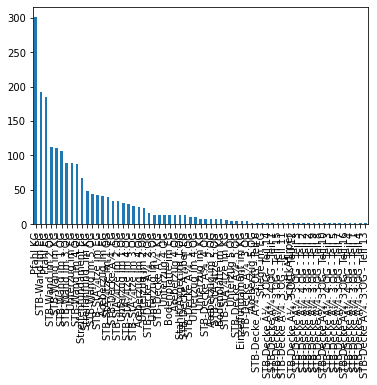

In [61]:
import matplotlib.pyplot as plt
vc = df['cpName'].value_counts()
with pd.option_context('display.max_rows', None):
    print(vc)
    print(df['cpName'].nunique())

vc.plot(kind='bar')
print(vc.mean())
print(vc.std())

IfcWall                537
IfcPile                486
IfcBeam                299
IfcWallStandardCase    205
IfcColumn              186
IfcSlab                137
IfcFooting             127
Name: ifcType, dtype: int64
282.42857142857144
166.89503402124456


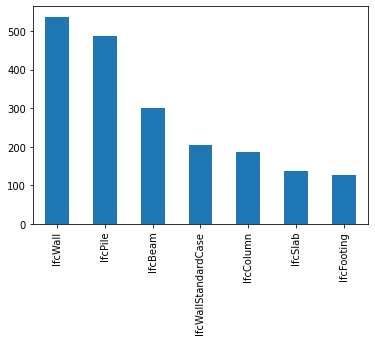

In [59]:
vc = df['ifcType'].value_counts()
with pd.option_context('display.max_rows', None):
    print(vc)

vc.plot(kind='bar')
print(vc.mean())
print(vc.std())

In [83]:
for c in df.columns:
    if df[c].dtype == 'object':
        vc = df[c].value_counts()
        if len(vc) > 30 and vc.std()/vc.mean() < 2:
            print('column:', c)
            print('unique: ', df[c].nunique())
            print('std/mean:', vc.std()/vc.mean(), end='\n\n\n\n')

column: cpName
unique:  65
std/mean: 1.7596300479051803





In [82]:
for g in df.groupby('cpMaterialID'):
    print(g)
    print('_______________________________________')

('0a09e15e-644e-4290-9dd1-1bf698bebf43',         Axis0X    Axis0Y  Axis0Z    Axis1X    Axis1Y  Axis1Z    Axis2X  \
18   -0.023286 -0.999729     0.0  0.999729 -0.023286     0.0  0.000000   
49   -0.023286 -0.999729     0.0  0.999729 -0.023286     0.0  0.000000   
91    0.681090 -0.732200     0.0  0.000000  0.000000     1.0 -0.732200   
194  -0.023286 -0.999729     0.0  0.999729 -0.023286     0.0  0.000000   
218   0.000000  0.000000    -1.0  0.046533  0.998917     0.0  0.998917   
279  -0.023286 -0.999729     0.0  0.999729 -0.023286     0.0  0.000000   
295  -0.023286 -0.999729     0.0  0.999729 -0.023286     0.0  0.000000   
583  -0.023322 -0.999728     0.0  0.999728 -0.023322     0.0  0.000000   
633  -0.999728  0.023322     0.0  0.000000  0.000000     1.0  0.023322   
659  -0.023286 -0.999729     0.0  0.999729 -0.023286     0.0  0.000000   
662  -0.023286 -0.999729     0.0  0.999729 -0.023286     0.0  0.000000   
688  -0.999729  0.023286     0.0  0.000000  0.000000     1.0  0.023286 

('7f672324-93ba-469f-8c65-3c4b80acacc7',         Axis0X    Axis0Y  Axis0Z  Axis1X  Axis1Y  Axis1Z    Axis2X    Axis2Y  \
364  -0.032390 -0.999475     0.0     0.0     0.0     1.0 -0.999475  0.032390   
1282  0.050188 -0.998740     0.0     0.0     0.0     1.0 -0.998740 -0.050188   

      Axis2Z    CenterX  ...  cpLateralArea  Pset_BeamCommon:Reference  \
364      0.0  22.340685  ...       2.636085                        NaN   
1282     0.0  25.364311  ...       2.636113                        NaN   

      Pset_BeamSpecific:ElementMainMateriality  Pset_SlabCommon:Reference  \
364                                        NaN                        NaN   
1282                                       NaN                        NaN   

      Pset_SlabCommon:LoadBearing cpCircumference    Volume    AreaXY  \
364                           NaN             NaN  0.031366  0.209418   
1282                          NaN             NaN  0.031400  0.209528   

        AreaYZ    AreaXZ  
364   0.209689  

In [86]:
def get_geometric_columns(df: pd.DataFrame, min_corr: float=.25):
    """
    finds the columns that are correlated with geometry columns
        parameters:
            df: DataFrame, Positional
                data in dataframe
            min_corr: float, Optional
                minimum correlation with geometry columns to count the column as geometric
        return: DataFrame
    """
    geometry = ['Volume', 'AreaXY', 'AreaXZ',
            'AreaYZ', 'ExtentX', 'ExtentY',
            'ExtentZ', 'Axis0X', 'Axis0Y',
            'Axis0Z', 'Axis1X', 'Axis1Y',
            'Axis1Z', 'Axis2X', 'Axis2Y', 'Axis2Z']

    corr = df.loc[:,df.dtypes=='float64'].corr()[geometry]
    return list(corr[~corr.index.isin(geometry)][corr > min_corr].dropna(axis=0, how='all').index)

In [87]:
df_geo = df[get_geometric_columns(df)]

['CenterZ',
 'cpLateralArea2',
 'cpBaseAreaContact',
 'cpCountTriangles',
 'cpTopAreaPartMin',
 'cpBBoxDX',
 'cpTopAreaPartMax',
 'cpMaterialAmbientBlue',
 'cpBaseArea',
 'cpSurfaceArea',
 'cpMaterialDiffuseBlue',
 'cpBaseAreaPartMax',
 'cpTopArea',
 'cpHasCurvedSurfacePart',
 'cpBBoxDZ',
 'cpBBoxMinZ',
 'cpTopAreaContact',
 'cpBaseAreaPartMin',
 'cpBBoxMaxZ',
 'cpSurfacePartAreaMax',
 'cpVolumeUnchecked',
 'cpBBoxDY',
 'cpCOGz',
 'cpCountVertices',
 'cpVolume',
 'cpLateralArea',
 'cpCircumference']

In [24]:
import pandas as pd
t = pd.concat([pd.DataFrame({'hi': [2,4]}), pd.DataFrame({'hi': [1,2]})], axis=1)
cols = list(t.columns)
for c, d in zip(range(len(cols)), t.columns.duplicated()):
    if d:
        cols[c] = cols[c] + '_1' 
t.columns = cols
t   

hi  hi_1
0   2     1
1   4     2